In [1]:
import pylab as plt
# %matplotlib inline

In [2]:
import numpy as np

In [3]:
np.random.uniform(low=6, high=16, size=(20,))

array([ 15.44762597,  14.77146595,   6.52604096,  13.9179328 ,
        15.59395171,  14.39875236,  13.30600798,   8.348056  ,
        14.36287693,  14.89524903,  12.29141995,   6.7428686 ,
        15.12847192,  14.83631901,   6.59593774,   7.14221878,
         7.26644665,  10.04283419,  12.64196749,   6.58906788])

In [16]:
def gen_im(n=1):
    
    rn = np.random.uniform(low=6, high=16, size=(20,))
    # Make a random plot...
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(rn,"r")
    ax.grid()
    
    fig.set_size_inches(2,2)
    fig.canvas.draw()

    # Now we can save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
#     data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    s = fig.canvas.get_width_height()[::-1]
    plt.close('all')

    return data, rn, s

In [17]:
def batch_gen(n=1):
    for i in range(n):
        if i==0:
            arr, vals, s = gen_im()
        else:
            tmparr, tmpvals, s = gen_im()
            arr = np.vstack((arr,tmparr))
            vals = np.vstack((vals,tmpvals))
            
    arr = arr.reshape(arr.shape[0], s[0], s[0], 3)[:,:,:,:]
    print(s)
    return arr, vals

In [71]:
x_train, y_train = batch_gen(n=1000)
x_test, y_test = batch_gen(n=100)

(144, 144)
(144, 144)


In [72]:
x_train = x_train[:,:,:,-1].reshape(*x_train.shape[:-1],1)
x_test = x_test[:,:,:,-1].reshape(*x_test.shape[:-1],1)

In [73]:
x_train.shape

(1000, 144, 144, 1)

In [78]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import optimizers
import matplotlib.pylab as plt

batch_size = 100
num_classes = 20
epochs = 20

# input image dimensions
img_x, img_y = 144, 144

# load the MNIST data set, which already splits into train and test sets for us
# (x_train, y_train), (x_test, y_test) = mnist.load_data()



# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
# x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
# x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices

# categorical_crossentropy loss below
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (1000, 144, 144, 1)
1000 train samples
100 test samples


In [79]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(6, 6), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2)))
model.add(Conv2D(65, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))

# pool_size = 8
# filter_size = 5

# model = Sequential([
#         Conv2D(32, 6, 6, input_shape=input_shape, activation='relu'), 
#         MaxPooling2D(pool_size=(pool_size, pool_size)), 
#         Conv2D(64, filter_size, filter_size, activation='relu'), 
#         MaxPooling2D(pool_size=(pool_size, pool_size)), 
#         Conv2D(128, filter_size, filter_size, activation='relu'), 
# # #         MaxPooling2D(pool_size=(pool_size, pool_size)), 
#         Conv2D(128, filter_size, filter_size, activation='relu'), 
# # #         MaxPooling2D(pool_size=(pool_size, pool_size)), 
#         Flatten(), 
#         Dropout(0.4), 
#         Dense(256, activation='relu'), 
#         Dropout(0.4), 
#         Dense(num_classes)
#     ])

# model.compile('adadelta', 'mse')
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])


class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

Train on 1000 samples, validate on 100 samples
Epoch 1/20
1000/1000 [==============================] - 9s - loss: 2489.2457 - acc: 0.0410 - val_loss: 2688.6677 - val_acc: 0.0600
Epoch 2/20
1000/1000 [==============================] - 6s - loss: 2108.6980 - acc: 0.0440 - val_loss: 2675.9175 - val_acc: 0.0600
Epoch 3/20
1000/1000 [==============================] - 6s - loss: 2324.0158 - acc: 0.0440 - val_loss: 2675.9175 - val_acc: 0.0600
Epoch 4/20
1000/1000 [==============================] - 6s - loss: 2254.2978 - acc: 0.0440 - val_loss: 2675.9175 - val_acc: 0.0600
Epoch 5/20
1000/1000 [==============================] - 6s - loss: 2243.6381 - acc: 0.0440 - val_loss: 2675.9175 - val_acc: 0.0600
Epoch 6/20
1000/1000 [==============================] - 6s - loss: 2334.3701 - acc: 0.0440 - val_loss: 2675.9175 - val_acc: 0.0600
Epoch 7/20
1000/1000 [==============================] - 6s - loss: 2301.0186 - acc: 0.0440 - val_loss: 2675.9175 - val_acc: 0.0600
Epoch 8/20
1000/1000 [==============

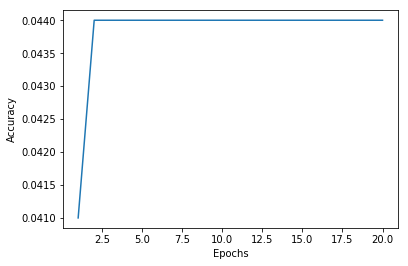

In [80]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, epochs+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

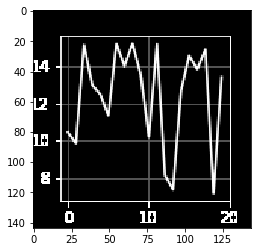

In [81]:
plt.imshow(x_train[0].reshape(144,144), cmap="Greys")
plt.show()

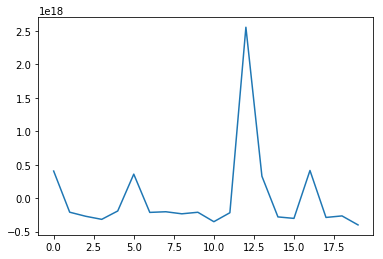

In [82]:
plt.plot(model.predict(x_test)[0])
plt.show()

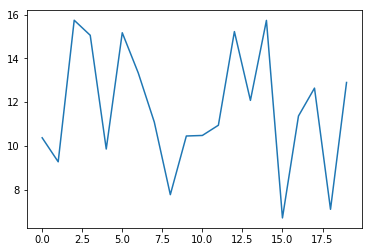

In [83]:
plt.plot(y_test[0])
plt.show()